In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
import json
from geopy.distance import geodesic

In [128]:
df_edges = pd.read_json('edges.json')
df_edges = df_edges.rename(columns={0: 'A', 1: 'B'})

df_fixes = pd.read_json('fixes.json')
df_fixes = df_fixes.reindex(sorted(df_fixes.columns), axis=1).astype(np.float64).T

In [129]:
df_fixes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1103 entries, ABQ to ZUVKU
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1103 non-null   float64
 1   longitude  1103 non-null   float64
dtypes: float64(2)
memory usage: 25.9+ KB


In [130]:
df_edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116108 entries, 0 to 116107
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   A       116108 non-null  object
 1   B       116108 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [131]:
df_edges[df_edges['A'] == "ADDVL"]

,A,B
384,ADDVL,AGENT
385,ADDVL,AGISM
386,ADDVL,AHAMU
387,ADDVL,ANPIY
388,ADDVL,ANY
...,...,...
451,ADDVL,WOVAS
452,ADDVL,WULBO
453,ADDVL,WYATE
454,ADDVL,ZESMO


In [132]:
df_fixes

,latitude,longitude
ABQ,35.043794,-106.816311
ABR,45.417356,-98.368719
ACO,41.107903,-81.201525
ADDVL,33.371758,-96.361231
AECIA,33.501636,-117.144678
...,...,...
ZUBUM,33.662194,-102.527178
ZUCRY,40.869361,-75.236436
ZUGTO,36.940394,-84.779761
ZULOM,32.888417,-109.676878


In [138]:
geodesic([df_fixes.loc["KSFO"][0], df_fixes.loc["KSFO"][1]] ,[ df_fixes.loc["KJFK"][0], df_fixes.loc["KJFK"][1] ]).km

4161.924389225965

In [116]:
df_combined = df_edges

In [117]:
df_combined["A_latitude"] = df_combined['A'].map(df_fixes["latitude"])
df_combined["A_longitude"] = df_combined['A'].map(df_fixes["longitude"])
df_combined["B_latitude"] = df_combined['B'].map(df_fixes["latitude"])
df_combined["B_longitude"] = df_combined['B'].map(df_fixes["longitude"])

In [118]:
df_combined

,A,B,A_latitude,A_longitude,B_latitude,B_longitude
0,ABQ,ADDVL,35.043794,-106.816311,33.371758,-96.361231
1,ABQ,AHAMU,35.043794,-106.816311,34.702697,-95.864267
2,ABQ,AKO,35.043794,-106.816311,40.155553,-103.179711
3,ABQ,ALS,35.043794,-106.816311,37.349158,-105.815536
4,ABQ,ANTHY,35.043794,-106.816311,31.310189,-100.543003
...,...,...,...,...,...,...
116103,ZUVKU,WISEP,40.876139,-124.039036,42.250111,-123.354881
116104,ZUVKU,WURUK,40.876139,-124.039036,44.412092,-120.921144
116105,ZUVKU,YAPUB,40.876139,-124.039036,38.322275,-122.949075
116106,ZUVKU,ZIDAX,40.876139,-124.039036,42.246989,-122.542739


In [119]:
df_combined["distance"] = df_combined.apply(lambda x: geodesic([x["A_latitude"], x["A_longitude"]] , [x["B_latitude"], x["B_longitude"]]).km, axis=1)

In [120]:
df_combined

,A,B,A_latitude,A_longitude,B_latitude,B_longitude,distance
0,ABQ,ADDVL,35.043794,-106.816311,33.371758,-96.361231,980.724944
1,ABQ,AHAMU,35.043794,-106.816311,34.702697,-95.864267,1001.543351
2,ABQ,AKO,35.043794,-106.816311,40.155553,-103.179711,651.776859
3,ABQ,ALS,35.043794,-106.816311,37.349158,-105.815536,271.177389
4,ABQ,ANTHY,35.043794,-106.816311,31.310189,-100.543003,716.530016
...,...,...,...,...,...,...,...
116103,ZUVKU,WISEP,40.876139,-124.039036,42.250111,-123.354881,162.920422
116104,ZUVKU,WURUK,40.876139,-124.039036,44.412092,-120.921144,468.602018
116105,ZUVKU,YAPUB,40.876139,-124.039036,38.322275,-122.949075,298.595223
116106,ZUVKU,ZIDAX,40.876139,-124.039036,42.246989,-122.542739,196.868845


(array([ 843., 1896., 3003., 4035., 4753., 5448., 6082., 6403., 6947.,
        7113., 7354., 7349., 7352., 7445., 7370., 7108., 6909., 6744.,
        6246., 5708.]),
 array([9.33145782e-03, 5.01361355e+01, 1.00262940e+02, 1.50389744e+02,
        2.00516548e+02, 2.50643352e+02, 3.00770156e+02, 3.50896960e+02,
        4.01023764e+02, 4.51150568e+02, 5.01277372e+02, 5.51404176e+02,
        6.01530980e+02, 6.51657784e+02, 7.01784589e+02, 7.51911393e+02,
        8.02038197e+02, 8.52165001e+02, 9.02291805e+02, 9.52418609e+02,
        1.00254541e+03]),
 <BarContainer object of 20 artists>)

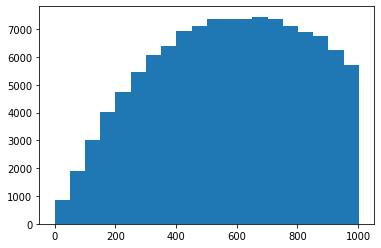

In [122]:
plt.hist(df_combined["distance"], 20)